# COMP5318 Assignment 2: Image Classification

### Group number: 81

This notebook includes the code to load the Fashion-MNIST dataset using Keras, and a skeleton for the main sections that should be included in the notebook. Please see the assignment specification for more detail. You may wish to add extra subsections where appropriate. 

Please focus on making your code clear, with appropriate variable names and whitespace. Include comments and markdown text to aid the readability of your code where relevant.

### **READ ME**


*   Some model constructions are built based on week 9 and week 8 lab sheets. Also algorithms reference to week 2, 3, 4, 5 lab sheet.
*   Our models are designed and splitted into 2 or 3 chunks: one for Construction of model; One for training; (If there is a graph) One for plotting
*   Please note that training takes plenty of time.
*   Our codes can run "Setup and dependencies", "Dataloading, preprocessing, and exploration" as preparation, and can directly run "Final models" part if you want!
* Thanks for reading and marking! Have a good day! :)


## Setup and dependencies
Please use this section to list and set up all your required libraries/dependencies and your plotting environment. 

In [ ]:
import sys
!{sys.executable} -m pip install -U scikeras
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
import scikeras
from scikeras.wrappers import KerasClassifier
# Ensure stability across runs
keras.backend.clear_session()
tf.random.set_seed(42)
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Part 1. Data loading, preprocessing, and exploration
We have included the code to load the dataset below. Please proceed with your data exploration and preprocessing steps, including creating any relevant data subsets required. The documentation for the data loading function can be accessed [here](https://keras.io/api/datasets/fashion_mnist/).

In [ ]:
# Load the Fashion-MNIST dataset training and test sets as numpy arrays
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# An ordered list of the class names
class_names = ["T-shirt/top",
               "Trouser",
               "Pullover",
               "Dress",
               "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle boot"
              ]

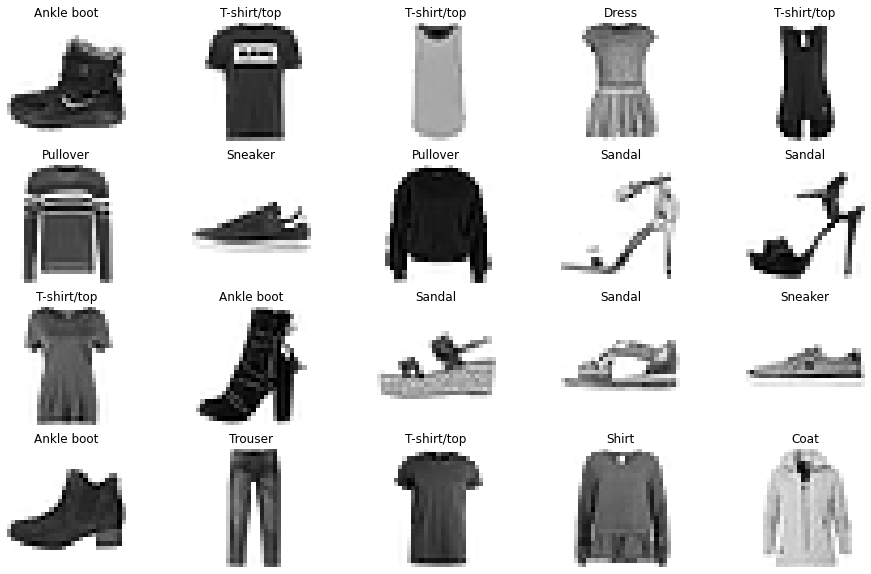

In [ ]:
plt.figure(figsize=(16,10)) # preview of first 20 labels that we are 
for i in range(20):# Reference to week7 lab sheet
  plt.subplot(4,5,i+1)# pictures may bit big for .pdf output of our code
  plt.imshow(X_train[i], cmap="binary")
  plt.title(class_names[y_train[i]])
  plt.axis("off")

### Normalization

In [ ]:
# scale data to 0~1 and get validation sets
# Normalization
X_train = X_train/255
X_test = X_test/255

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                        train_size=0.9, random_state=0)

### Preprocessing

In [ ]:
X_train_CNN = np.expand_dims(X_train, -1)
X_valid_CNN = np.expand_dims(X_valid, -1)
X_test_CNN = np.expand_dims(X_test, -1)

## Part 2. Algorithm design and setup

### Algorithm of choice from first six weeks of course

In [ ]:
# We tried all algorithms from preivous 6 weeks and we will use the best
# one for our project. All codes will be shown in following chunks, outputs 
# will be kept
# Reference to all lab sheets from week1 to week6

In [ ]:
# Ensembles: Bagging, Ada Boost and Gradient Boosting
def bagDTClassifier(X, y, n_estimators, max_samples, max_depth):
    bag = BaggingClassifier(DecisionTreeClassifier(max_depth = max_depth, 
                                                   random_state=0),
                            max_samples=max_samples, 
                            n_estimators = n_estimators, 
                            max_features = max_depth, random_state=0)
    scores = cross_val_score(bag, X, y, cv=10)
    bag.fit(X, y)
    return scores.mean()

def adaDTClassifier(X, y, n_estimators, learning_rate, max_depth):
    ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth = max_depth, 
                                                    random_state=0),
                             n_estimators=n_estimators, 
                             learning_rate = learning_rate, random_state = 0)
    ada.fit(X, y)
    scores = cross_val_score(ada, X, y, cv=10)
    return scores.mean()

def gbClassifier(X, y, n_estimators, learning_rate):
    gb = GradientBoostingClassifier(n_estimators=n_estimators, 
                                    learning_rate = learning_rate, 
                                    random_state=0)
    gb.fit(X, y)
    scores = cross_val_score(gb, X, y, cv=10)
    return scores.mean()
print("bag: ",bagDTClassifier(X_train.reshape(54000,28*28), 
                              y_train, 50, 100, 5))
print("ada: ",adaDTClassifier(X_train.reshape(54000,28*28), 
                              y_train, 50, 0.5, 5))
print("gb: ",gbClassifier(X_train.reshape(54000,28*28), y_train, 50, 0.5))

bag:  0.7025185185185185
ada:  0.7109444444444444


In [ ]:
lin_svm = SVC(kernel="linear")
lin_svm.fit(X_train.reshape(54000,28*28), y_train)
y_pred_svm = lin_svm.predict(X_test.reshape(10000,28*28))
print("Linear SVM - accuracy on test set: {:.3f}".format(accuracy_score(y_test, 
                                                                  y_pred_svm)))

Linear SVM - accuracy on test set: 0.844


In [ ]:
#Naïve Bayes
def nbClassifier(X, y):
    NB = GaussianNB()
    NB.fit(X, y)
    scores = cross_val_score(NB, X, y, cv=10)
    return scores.mean()
print("NB: ",nbClassifier(X_train.reshape(54000,28*28), y_train))

NB:  0.6104999999999999


In [ ]:
# Decision Tree
def dtClassifier(X, y):
    DT = DecisionTreeClassifier(random_state=0)
    DT.fit(X, y)
    scores = cross_val_score(DT, X, y, cv=10)
    return scores.mean()
print("DT: ",dtClassifier(X_train.reshape(54000,28*28), y_train))

DT:  0.7943333333333334


In [ ]:
def kNNClassifier(X, y, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    scores = cross_val_score(knn, X, y, cv=10)
    return scores.mean()
print("knn: ",kNNClassifier(X_train.reshape(54000,28*28),y_train, 3))

knn:  0.8517407407407408


In [ ]:
rf = RandomForestClassifier(criterion = "entropy", random_state = 0)
rf.fit(X_train.reshape(54000,28*28), y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test.reshape(10000,28*28))
print("RF - accuracy on test set: {:.3f}".format(accuracy_score(y_test, 
                                                                y_pred)))

RF - accuracy on test set: 0.877


In [ ]:
# If we compare the accuracy among these algorithms, RF is the best. 
# More reasons why we chose RF as the best algorithm will be introduced in 
# the report.

### Fully connected neural network

In [ ]:
# Codes that used for constructing fully connected neural network 
# are from week 7 lab sheet. (Part 3 also uses codes from week 7 lab sheet)
# Reference to week 7 lab sheet.

In [ ]:
fcnn_part1_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="tanh"),
    keras.layers.Dense(100, activation="tanh"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
opt = keras.optimizers.SGD(learning_rate=5e-2)
fcnn_part1_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
fcnn_part1_history = fcnn_part1_model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.5239 - accuracy: 0.8111 - val_loss: 0.4249 - val_accuracy: 0.8477
Epoch 2/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4071 - accuracy: 0.8523 - val_loss: 0.3889 - val_accuracy: 0.8598
Epoch 3/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3723 - accuracy: 0.8646 - val_loss: 0.3677 - val_accuracy: 0.8687
Epoch 4/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3476 - accuracy: 0.8737 - val_loss: 0.3632 - val_accuracy: 0.8668
Epoch 5/20
1688/1688 [==============================] - 9s 6ms/step - loss: 0.3305 - accuracy: 0.8791 - val_loss: 0.3554 - val_accuracy: 0.8742
Epoch 6/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3148 - accuracy: 0.8841 - val_loss: 0.3524 - val_accuracy: 0.8715
Epoch 7/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3018 - accuracy: 0.8878 - val_loss: 0.3222 - val_accurac

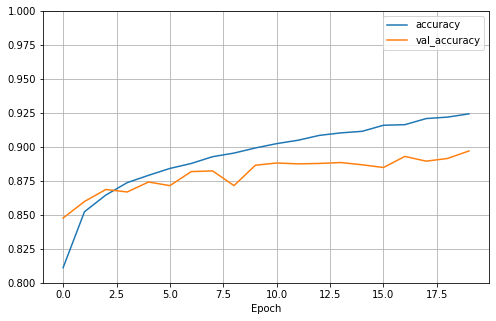

In [ ]:
import pandas as pd

# Convert the history dictionary to a Pandas dataframe and extract accuracies
fcnn_part1_accuracies = pd.DataFrame(fcnn_part1_history.history)[['accuracy', 
                                                                'val_accuracy']]

# Plot the accuracies
fcnn_part1_accuracies.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.8, 1)
plt.xlabel('Epoch')
plt.show()

In [ ]:
# Evaluate the classifier on the test data.
loss, accuracy = fcnn_part1_model.evaluate(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3226 - accuracy: 0.8861
Accuracy on test data: 0.8861


### Convolutional neural network

In [ ]:
# Codes used for CNN are from week 8 lab sheet. (Part 3 also uses codes from 
# week 8 lab sheet)
# Reference to week 8 lab sheet.

In [ ]:
model_CNN1_part1 = keras.Sequential([
    
    # Specify the input shape
    keras.Input(shape=(28, 28, 1)),
    
    # Conv and pool block 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Conv and pool block 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten and classify using dense output layer
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax"),
])
# reference to week7 lab

In [ ]:
model_CNN1_part1.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])

In [ ]:
batch_size = 128
epochs = 10
CNN_history_part1 = model_CNN1_part1.fit(X_train_CNN, y_train, 
                                         batch_size=batch_size,
                    epochs=epochs, validation_data=(X_valid_CNN, y_valid))

Epoch 1/10
422/422 [==============================] - 39s 92ms/step - loss: 0.6828 - accuracy: 0.7513 - val_loss: 0.4194 - val_accuracy: 0.8503
Epoch 2/10
422/422 [==============================] - 38s 91ms/step - loss: 0.4464 - accuracy: 0.8379 - val_loss: 0.3784 - val_accuracy: 0.8620
Epoch 3/10
422/422 [==============================] - 38s 91ms/step - loss: 0.3947 - accuracy: 0.8583 - val_loss: 0.3321 - val_accuracy: 0.8820
Epoch 4/10
422/422 [==============================] - 38s 91ms/step - loss: 0.3650 - accuracy: 0.8689 - val_loss: 0.3169 - val_accuracy: 0.8837
Epoch 5/10
422/422 [==============================] - 38s 90ms/step - loss: 0.3448 - accuracy: 0.8761 - val_loss: 0.3022 - val_accuracy: 0.8927
Epoch 6/10
422/422 [==============================] - 38s 91ms/step - loss: 0.3280 - accuracy: 0.8814 - val_loss: 0.2865 - val_accuracy: 0.8965
Epoch 7/10
422/422 [==============================] - 38s 91ms/step - loss: 0.3155 - accuracy: 0.8864 - val_loss: 0.2854 - val_accuracy:

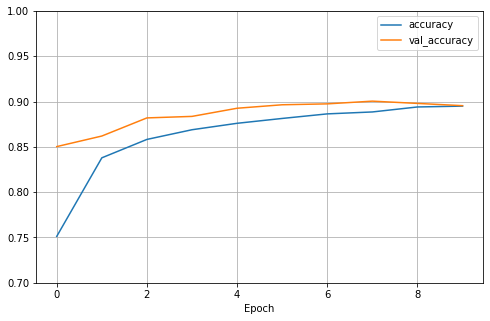

In [ ]:
CNN_history_part1_accuracies = pd.DataFrame(CNN_history_part1.
                                            history)[['accuracy', 
                                                      'val_accuracy']]
CNN_history_part1_accuracies.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.7, 1)
plt.xlabel('Epoch')
plt.show()

## Part 3. Hyperparameter tuning

### Algorithm of choice from first six weeks of course

In [ ]:
n_estimators = [10, 50, 100]
max_leaf_nodes = [4, 30, None]
rf_grid = {'n_estimators':list(n_estimators), 
           'max_leaf_nodes':list(max_leaf_nodes)}
def bestRFClassifier(X_training,y_training,X_testing,y_testing):
    rf = RandomForestClassifier(criterion = "entropy", random_state = 0)
    grid_search = GridSearchCV(rf, rf_grid, cv=3,
                          return_train_score=True)
    grid_search.fit(X_training, y_training)
    test_score = round(grid_search.score(X_testing, y_testing), 4)  
    best_par = grid_search.best_params_# following variables are for outputs
    cv_score = round(grid_search.best_score_, 4)
    return best_par['n_estimators'], best_par['max_leaf_nodes'], cv_score, 
    test_score#(appropriate values so that the required printing can be done)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
b_n_e, max_nodes, rf_sv_score, rf_test_score = bestRFClassifier(\
    X_train.reshape(54000,28*28), y_train, X_test.reshape(10000,28*28), 
    y_test)
print("RF best n_estimators: ", b_n_e)
print("RF best max_leaf_nodes: ", max_nodes)
print("RF cross-validation accuracy: ", format(rf_sv_score, ".4f"))
print("RF test set accuracy: ", format(rf_test_score, ".4f"))

RF best n_estimators:  100
RF best max_leaf_nodes:  None
RF cross-validation accuracy:  0.8793
RF test set accuracy:  0.8767


#### RF2: n_estimator=10, max_leaf_nodes=None

In [ ]:
rf2 = RandomForestClassifier(criterion = "entropy", random_state = 0, 
                             n_estimators = 10, max_leaf_nodes = None)

rf2.fit(X_train.reshape(54000,28*28), y_train)
y_pred2 = rf2.predict(X_test.reshape(10000,28*28))
print("RF2 - accuracy on test set: {:.3f}".format(accuracy_score(y_test, 
                                                                 y_pred2)))

RF2 - accuracy on test set: 0.856


#### RF3: n_estimator=100, max_leaf_nodes=4

In [ ]:
rf3 = RandomForestClassifier(criterion = "entropy", random_state = 0, 
                             n_estimators = 100, max_leaf_nodes = 4)

rf3.fit(X_train.reshape(54000,28*28), y_train)
y_pred3 = rf3.predict(X_test.reshape(10000,28*28))
print("RF3 - accuracy on test set: {:.3f}".format(accuracy_score(y_test, 
                                                                 y_pred3)))

RF3 - accuracy on test set: 0.572


### Fully connected neural network

In [ ]:
import sys
!{sys.executable} -m pip install -U scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikeras
from scikeras.wrappers import KerasClassifier

def build_mlp(
    n_hidden_layers=2, n_hidden_neurons=50,
    activation_function="relu", input_shape=[28,28]
):
    """Build a Keras MLP for 10 class classification with desired parameters."""
    
    model = keras.models.Sequential()
    
    # Add the input layer
    model.add(keras.layers.Flatten(input_shape=input_shape))
    
    # Add the hidden layers with desired size and activation function
    for layer in range(n_hidden_layers):
        model.add(keras.layers.Dense(n_hidden_neurons, 
                                     activation=activation_function))
        
    # Add the output layer for 10 class classification
    model.add(keras.layers.Dense(10, activation="softmax"))
    
    return model

# Create a KerasClassifier object which works with sklearn grid searches
# We need to pass default values of arguments in build_mlp if we wish to 
# tune them
keras_classifier = KerasClassifier(build_mlp,
                                   n_hidden_layers=2,
                                   n_hidden_neurons=50,
                                   activation_function="relu",
                                   loss="sparse_categorical_crossentropy",
                                   optimizer="sgd",
                                   optimizer__lr=0.01,
                                   metrics=["accuracy"]
                                  )
# reference week8 lab

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "optimizer__lr": [0.1, 0.01, 0.05],
    "activation_function": ["tanh", None] # here are only tanh and None, 
}                                         # but we have a defult value "relu" 
# which defined in keras_classifier. So we tested 3 differ activation functions.
grid_search_cv = GridSearchCV(keras_classifier, param_grid, cv=3, verbose=2)
grid_search_cv.fit(X_train, y_train, epochs=20, validation_data=(X_valid, 
                                                                 y_valid))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
1125/1125 [==============================] - 3s 2ms/step - loss: 0.5778 - accuracy: 0.7916 - val_loss: 0.4545 - val_accuracy: 0.8335
Epoch 2/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4298 - accuracy: 0.8445 - val_loss: 0.4377 - val_accuracy: 0.8358
Epoch 3/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3907 - accuracy: 0.8573 - val_loss: 0.3872 - val_accuracy: 0.8530
Epoch 4/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3621 - accuracy: 0.8668 - val_loss: 0.3823 - val_accuracy: 0.8602
Epoch 5/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3463 - accuracy: 0.8729 - val_loss: 0.3865 - val_accuracy: 0.8592
Epoch 6/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3300 - accuracy: 0.8796 - val_loss: 0.3495 - val_accuracy: 0.8745
Epoch 7/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3152 - accuracy: 0.8831 - val_loss: 0.3528 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1125/1125 [==============================] - 2s 2ms/step - loss: 0.5840 - accuracy: 0.7886 - val_loss: 0.4400 - val_accuracy: 0.8390
Epoch 2/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4327 - accuracy: 0.8424 - val_loss: 0.4077 - val_accuracy: 0.8467
Epoch 3/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3929 - accuracy: 0.8546 - val_loss: 0.4038 - val_accuracy: 0.8510
Epoch 4/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3653 - accuracy: 0.8659 - val_loss: 0.3899 - val_accuracy: 0.8537
Epoch 5/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3484 - accuracy: 0.8704 - val_loss: 0.3602 - val_accuracy: 0.8687
Epoch 6/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3326 - accuracy: 0.8764 - val_loss: 0.3476 - val_accuracy: 0.8742
Epoch 7/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3187 - accuracy: 0.8825 - val_loss: 0.3341 - val_accuracy: 0.8775
Epo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1125/1125 [==============================] - 3s 2ms/step - loss: 0.5668 - accuracy: 0.7948 - val_loss: 0.4671 - val_accuracy: 0.8292
Epoch 2/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4246 - accuracy: 0.8445 - val_loss: 0.3949 - val_accuracy: 0.8573
Epoch 3/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3878 - accuracy: 0.8589 - val_loss: 0.3974 - val_accuracy: 0.8578
Epoch 4/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3605 - accuracy: 0.8683 - val_loss: 0.3895 - val_accuracy: 0.8555
Epoch 5/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3429 - accuracy: 0.8727 - val_loss: 0.3597 - val_accuracy: 0.8720
Epoch 6/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3273 - accuracy: 0.8782 - val_loss: 0.3986 - val_accuracy: 0.8575
Epoch 7/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3150 - accuracy: 0.8830 - val_loss: 0.3460 - val_accuracy: 0.8717
Epo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1125/1125 [==============================] - 3s 2ms/step - loss: 0.8728 - accuracy: 0.7216 - val_loss: 0.6148 - val_accuracy: 0.7910
Epoch 2/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.5514 - accuracy: 0.8100 - val_loss: 0.5117 - val_accuracy: 0.8235
Epoch 3/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4887 - accuracy: 0.8279 - val_loss: 0.4724 - val_accuracy: 0.8357
Epoch 4/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4568 - accuracy: 0.8372 - val_loss: 0.4511 - val_accuracy: 0.8405
Epoch 5/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4373 - accuracy: 0.8426 - val_loss: 0.4370 - val_accuracy: 0.8428
Epoch 6/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4211 - accuracy: 0.8501 - val_loss: 0.4250 - val_accuracy: 0.8473
Epoch 7/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4091 - accuracy: 0.8528 - val_loss: 0.4140 - val_accuracy: 0.8488
Epo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1125/1125 [==============================] - 2s 2ms/step - loss: 0.8807 - accuracy: 0.7206 - val_loss: 0.6163 - val_accuracy: 0.7990
Epoch 2/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.5580 - accuracy: 0.8108 - val_loss: 0.5153 - val_accuracy: 0.8222
Epoch 3/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4925 - accuracy: 0.8290 - val_loss: 0.4714 - val_accuracy: 0.8382
Epoch 4/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4588 - accuracy: 0.8399 - val_loss: 0.4618 - val_accuracy: 0.8348
Epoch 5/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4375 - accuracy: 0.8443 - val_loss: 0.4331 - val_accuracy: 0.8478
Epoch 6/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4215 - accuracy: 0.8508 - val_loss: 0.4229 - val_accuracy: 0.8490
Epoch 7/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4083 - accuracy: 0.8533 - val_loss: 0.4115 - val_accuracy: 0.8527
Epo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1125/1125 [==============================] - 2s 2ms/step - loss: 0.9027 - accuracy: 0.7194 - val_loss: 0.6262 - val_accuracy: 0.7903
Epoch 2/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.5566 - accuracy: 0.8105 - val_loss: 0.5137 - val_accuracy: 0.8283
Epoch 3/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4890 - accuracy: 0.8292 - val_loss: 0.4735 - val_accuracy: 0.8380
Epoch 4/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4549 - accuracy: 0.8391 - val_loss: 0.4614 - val_accuracy: 0.8345
Epoch 5/20
1125/1125 [==============================] - 3s 2ms/step - loss: 0.4334 - accuracy: 0.8457 - val_loss: 0.4316 - val_accuracy: 0.8498
Epoch 6/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4173 - accuracy: 0.8520 - val_loss: 0.4317 - val_accuracy: 0.8472
Epoch 7/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4039 - accuracy: 0.8562 - val_loss: 0.4124 - val_accuracy: 0.8542
Epo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1125/1125 [==============================] - 3s 2ms/step - loss: 0.6155 - accuracy: 0.7853 - val_loss: 0.4647 - val_accuracy: 0.8330
Epoch 2/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4410 - accuracy: 0.8421 - val_loss: 0.4381 - val_accuracy: 0.8373
Epoch 3/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4042 - accuracy: 0.8552 - val_loss: 0.3924 - val_accuracy: 0.8588
Epoch 4/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3767 - accuracy: 0.8636 - val_loss: 0.3939 - val_accuracy: 0.8553
Epoch 5/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3605 - accuracy: 0.8682 - val_loss: 0.3804 - val_accuracy: 0.8595
Epoch 6/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3432 - accuracy: 0.8750 - val_loss: 0.3550 - val_accuracy: 0.8678
Epoch 7/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3303 - accuracy: 0.8792 - val_loss: 0.3555 - val_accuracy: 0.8705
Epo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1125/1125 [==============================] - 3s 2ms/step - loss: 0.6110 - accuracy: 0.7879 - val_loss: 0.4547 - val_accuracy: 0.8375
Epoch 2/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4469 - accuracy: 0.8380 - val_loss: 0.4094 - val_accuracy: 0.8503
Epoch 3/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4081 - accuracy: 0.8511 - val_loss: 0.3936 - val_accuracy: 0.8592
Epoch 4/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3810 - accuracy: 0.8616 - val_loss: 0.4272 - val_accuracy: 0.8432
Epoch 5/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3626 - accuracy: 0.8672 - val_loss: 0.3736 - val_accuracy: 0.8660
Epoch 6/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3487 - accuracy: 0.8728 - val_loss: 0.3647 - val_accuracy: 0.8698
Epoch 7/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3362 - accuracy: 0.8778 - val_loss: 0.3502 - val_accuracy: 0.8710
Epo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1125/1125 [==============================] - 3s 2ms/step - loss: 0.6070 - accuracy: 0.7895 - val_loss: 0.4527 - val_accuracy: 0.8380
Epoch 2/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4369 - accuracy: 0.8437 - val_loss: 0.4048 - val_accuracy: 0.8558
Epoch 3/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3997 - accuracy: 0.8559 - val_loss: 0.3957 - val_accuracy: 0.8572
Epoch 4/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3751 - accuracy: 0.8650 - val_loss: 0.4161 - val_accuracy: 0.8428
Epoch 5/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3602 - accuracy: 0.8684 - val_loss: 0.3679 - val_accuracy: 0.8693
Epoch 6/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3438 - accuracy: 0.8738 - val_loss: 0.4049 - val_accuracy: 0.8543
Epoch 7/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.3314 - accuracy: 0.8784 - val_loss: 0.3631 - val_accuracy: 0.8653
Epo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1125/1125 [==============================] - 3s 2ms/step - loss: 0.6358 - accuracy: 0.7753 - val_loss: 0.5138 - val_accuracy: 0.8147
Epoch 2/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.5064 - accuracy: 0.8229 - val_loss: 0.4948 - val_accuracy: 0.8177
Epoch 3/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4782 - accuracy: 0.8334 - val_loss: 0.4700 - val_accuracy: 0.8328
Epoch 4/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4627 - accuracy: 0.8376 - val_loss: 0.4708 - val_accuracy: 0.8395
Epoch 5/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4556 - accuracy: 0.8397 - val_loss: 0.4547 - val_accuracy: 0.8353
Epoch 6/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4479 - accuracy: 0.8431 - val_loss: 0.4483 - val_accuracy: 0.8400
Epoch 7/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4428 - accuracy: 0.8448 - val_loss: 0.4760 - val_accuracy: 0.8280
Epo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1125/1125 [==============================] - 3s 2ms/step - loss: 0.7005 - accuracy: 0.7667 - val_loss: 0.5091 - val_accuracy: 0.8218
Epoch 2/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.5095 - accuracy: 0.8196 - val_loss: 0.4640 - val_accuracy: 0.8362
Epoch 3/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4843 - accuracy: 0.8295 - val_loss: 0.4583 - val_accuracy: 0.8402
Epoch 4/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4666 - accuracy: 0.8377 - val_loss: 0.4948 - val_accuracy: 0.8218
Epoch 5/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4574 - accuracy: 0.8374 - val_loss: 0.4626 - val_accuracy: 0.8398
Epoch 6/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4510 - accuracy: 0.8403 - val_loss: 0.4652 - val_accuracy: 0.8447
Epoch 7/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4429 - accuracy: 0.8425 - val_loss: 0.4270 - val_accuracy: 0.8457
Epo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1125/1125 [==============================] - 3s 2ms/step - loss: 0.6740 - accuracy: 0.7719 - val_loss: 0.5127 - val_accuracy: 0.8207
Epoch 2/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.5026 - accuracy: 0.8224 - val_loss: 0.4706 - val_accuracy: 0.8365
Epoch 3/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4755 - accuracy: 0.8317 - val_loss: 0.4685 - val_accuracy: 0.8340
Epoch 4/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4601 - accuracy: 0.8391 - val_loss: 0.4915 - val_accuracy: 0.8220
Epoch 5/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4498 - accuracy: 0.8427 - val_loss: 0.4496 - val_accuracy: 0.8465
Epoch 6/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4427 - accuracy: 0.8444 - val_loss: 0.4876 - val_accuracy: 0.8320
Epoch 7/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4351 - accuracy: 0.8457 - val_loss: 0.4423 - val_accuracy: 0.8473
Epo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1125/1125 [==============================] - 2s 2ms/step - loss: 0.7647 - accuracy: 0.7426 - val_loss: 0.5626 - val_accuracy: 0.8102
Epoch 2/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.5323 - accuracy: 0.8175 - val_loss: 0.5032 - val_accuracy: 0.8193
Epoch 3/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4906 - accuracy: 0.8297 - val_loss: 0.4725 - val_accuracy: 0.8340
Epoch 4/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4688 - accuracy: 0.8370 - val_loss: 0.4672 - val_accuracy: 0.8375
Epoch 5/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4567 - accuracy: 0.8423 - val_loss: 0.4592 - val_accuracy: 0.8393
Epoch 6/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4464 - accuracy: 0.8454 - val_loss: 0.4447 - val_accuracy: 0.8442
Epoch 7/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4395 - accuracy: 0.8463 - val_loss: 0.4408 - val_accuracy: 0.8427
Epo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1125/1125 [==============================] - 3s 2ms/step - loss: 0.7667 - accuracy: 0.7391 - val_loss: 0.5645 - val_accuracy: 0.8053
Epoch 2/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.5354 - accuracy: 0.8137 - val_loss: 0.5019 - val_accuracy: 0.8255
Epoch 3/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4916 - accuracy: 0.8279 - val_loss: 0.4701 - val_accuracy: 0.8387
Epoch 4/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4688 - accuracy: 0.8382 - val_loss: 0.5004 - val_accuracy: 0.8183
Epoch 5/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4553 - accuracy: 0.8401 - val_loss: 0.4472 - val_accuracy: 0.8452
Epoch 6/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4446 - accuracy: 0.8462 - val_loss: 0.4448 - val_accuracy: 0.8443
Epoch 7/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4365 - accuracy: 0.8482 - val_loss: 0.4378 - val_accuracy: 0.8427
Epo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1125/1125 [==============================] - 3s 2ms/step - loss: 0.7420 - accuracy: 0.7478 - val_loss: 0.5537 - val_accuracy: 0.8138
Epoch 2/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.5271 - accuracy: 0.8171 - val_loss: 0.4943 - val_accuracy: 0.8282
Epoch 3/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4869 - accuracy: 0.8299 - val_loss: 0.4895 - val_accuracy: 0.8277
Epoch 4/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4657 - accuracy: 0.8378 - val_loss: 0.4858 - val_accuracy: 0.8258
Epoch 5/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4524 - accuracy: 0.8407 - val_loss: 0.4477 - val_accuracy: 0.8462
Epoch 6/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4429 - accuracy: 0.8453 - val_loss: 0.4633 - val_accuracy: 0.8360
Epoch 7/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4343 - accuracy: 0.8487 - val_loss: 0.4429 - val_accuracy: 0.8415
Epo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1125/1125 [==============================] - 2s 2ms/step - loss: 0.6184 - accuracy: 0.7797 - val_loss: 0.5034 - val_accuracy: 0.8197
Epoch 2/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4932 - accuracy: 0.8277 - val_loss: 0.4851 - val_accuracy: 0.8218
Epoch 3/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4668 - accuracy: 0.8378 - val_loss: 0.4564 - val_accuracy: 0.8390
Epoch 4/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4502 - accuracy: 0.8431 - val_loss: 0.4601 - val_accuracy: 0.8412
Epoch 5/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4435 - accuracy: 0.8436 - val_loss: 0.4431 - val_accuracy: 0.8427
Epoch 6/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4346 - accuracy: 0.8478 - val_loss: 0.4372 - val_accuracy: 0.8452
Epoch 7/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4289 - accuracy: 0.8496 - val_loss: 0.4546 - val_accuracy: 0.8355
Epo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1125/1125 [==============================] - 3s 2ms/step - loss: 0.6328 - accuracy: 0.7761 - val_loss: 0.5026 - val_accuracy: 0.8228
Epoch 2/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4969 - accuracy: 0.8253 - val_loss: 0.4616 - val_accuracy: 0.8372
Epoch 3/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4720 - accuracy: 0.8333 - val_loss: 0.4493 - val_accuracy: 0.8423
Epoch 4/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4541 - accuracy: 0.8422 - val_loss: 0.5005 - val_accuracy: 0.8203
Epoch 5/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4448 - accuracy: 0.8429 - val_loss: 0.4526 - val_accuracy: 0.8412
Epoch 6/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4372 - accuracy: 0.8458 - val_loss: 0.4515 - val_accuracy: 0.8452
Epoch 7/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4299 - accuracy: 0.8479 - val_loss: 0.4261 - val_accuracy: 0.8502
Epo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1125/1125 [==============================] - 3s 2ms/step - loss: 0.6140 - accuracy: 0.7827 - val_loss: 0.4893 - val_accuracy: 0.8290
Epoch 2/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4888 - accuracy: 0.8281 - val_loss: 0.4568 - val_accuracy: 0.8410
Epoch 3/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4634 - accuracy: 0.8366 - val_loss: 0.4638 - val_accuracy: 0.8345
Epoch 4/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4473 - accuracy: 0.8439 - val_loss: 0.4756 - val_accuracy: 0.8285
Epoch 5/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4378 - accuracy: 0.8451 - val_loss: 0.4386 - val_accuracy: 0.8493
Epoch 6/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4294 - accuracy: 0.8498 - val_loss: 0.4724 - val_accuracy: 0.8323
Epoch 7/20
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4218 - accuracy: 0.8504 - val_loss: 0.4372 - val_accuracy: 0.8470
Epo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1688/1688 [==============================] - 3s 2ms/step - loss: 0.5568 - accuracy: 0.8012 - val_loss: 0.4344 - val_accuracy: 0.8447
Epoch 2/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4175 - accuracy: 0.8480 - val_loss: 0.3953 - val_accuracy: 0.8578
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3810 - accuracy: 0.8610 - val_loss: 0.3693 - val_accuracy: 0.8678
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3569 - accuracy: 0.8701 - val_loss: 0.3682 - val_accuracy: 0.8647
Epoch 5/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3413 - accuracy: 0.8759 - val_loss: 0.3582 - val_accuracy: 0.8732
Epoch 6/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3272 - accuracy: 0.8808 - val_loss: 0.3755 - val_accuracy: 0.8630
Epoch 7/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3154 - accuracy: 0.8842 - val_loss: 0.3329 - val_accuracy: 0.8787
Epo

GridSearchCV(cv=3,
             estimator=KerasClassifier(activation_function='relu', loss='sparse_categorical_crossentropy', metrics=['accuracy'], model=<function build_mlp at 0x7f518887e050>, n_hidden_layers=2, n_hidden_neurons=50, optimizer='sgd', optimizer__lr=0.01),
             param_grid={'activation_function': ['tanh', None],
                         'optimizer__lr': [0.1, 0.01, 0.05]},
             verbose=2)

In [ ]:
best_one_here = grid_search_cv.best_estimator_# best one is with "relu" and 
best_one_params = grid_search_cv.best_params_# learning rate=0.01

In [ ]:
best_one_params

{'activation_function': 'tanh', 'optimizer__lr': 0.05}

In [ ]:
history = best_one_here.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1688/1688 [==============================] - 4s 2ms/step - loss: 0.5572 - accuracy: 0.8049 - val_loss: 0.4393 - val_accuracy: 0.8385
Epoch 2/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4158 - accuracy: 0.8495 - val_loss: 0.3883 - val_accuracy: 0.8610
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3792 - accuracy: 0.8618 - val_loss: 0.3735 - val_accuracy: 0.8670
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3549 - accuracy: 0.8699 - val_loss: 0.3747 - val_accuracy: 0.8622
Epoch 5/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3389 - accuracy: 0.8756 - val_loss: 0.3585 - val_accuracy: 0.8700
Epoch 6/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3248 - accuracy: 0.8811 - val_loss: 0.3767 - val_accuracy: 0.8647
Epoch 7/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3136 - accuracy: 0.8840 - val_loss: 0.3245 - val_accuracy: 0.8815
Epo

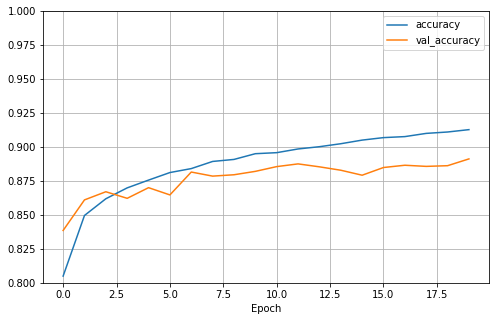

In [ ]:
# Convert the history dictionary to a Pandas dataframe and extract the 
# accuracies
accuracies = pd.DataFrame(history.history_)[['accuracy', 'val_accuracy']]

# Plot the accuracies
accuracies.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.8, 1)
plt.xlabel('Epoch')
plt.show()

#### Fully connected neural network2(act_function=None, l_r=0.05)

In [ ]:
fcnn_model_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation=None),
    keras.layers.Dense(100, activation=None),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
opt = keras.optimizers.SGD(learning_rate=0.05)
fcnn_model_2.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
fcnn_history2 = fcnn_model_2.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5677 - accuracy: 0.8016 - val_loss: 0.4804 - val_accuracy: 0.8303
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4719 - accuracy: 0.8340 - val_loss: 0.4704 - val_accuracy: 0.8340
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4511 - accuracy: 0.8422 - val_loss: 0.4607 - val_accuracy: 0.8388
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4403 - accuracy: 0.8465 - val_loss: 0.4592 - val_accuracy: 0.8368
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4322 - accuracy: 0.8486 - val_loss: 0.4705 - val_accuracy: 0.8375
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4265 - accuracy: 0.8518 - val_loss: 0.4478 - val_accuracy: 0.8437
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4203 - accuracy: 0.8519 - val_loss: 0.4790 - val_accuracy:

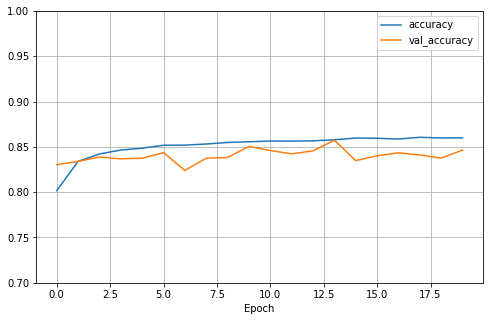

In [ ]:
fcnn_accuracies2 = pd.DataFrame(fcnn_history2.history)[['accuracy', 
                                                        'val_accuracy']]

# Plot the accuracies
fcnn_accuracies2.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.7, 1)
plt.xlabel('Epoch')
plt.show()

#### Fully connected neural network3(act_function=tanh, l_r=0.01)

In [ ]:
fcnn_model_3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="tanh"),
    keras.layers.Dense(100, activation="tanh"),
    keras.layers.Dense(10, activation="softmax")
])
opt = keras.optimizers.SGD(learning_rate=0.01)
fcnn_model_3.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
fcnn_history3 = fcnn_model_3.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.6549 - accuracy: 0.7816 - val_loss: 0.5058 - val_accuracy: 0.8248
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4704 - accuracy: 0.8334 - val_loss: 0.4476 - val_accuracy: 0.8428
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4322 - accuracy: 0.8463 - val_loss: 0.4250 - val_accuracy: 0.8490
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4098 - accuracy: 0.8549 - val_loss: 0.4117 - val_accuracy: 0.8537
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3940 - accuracy: 0.8590 - val_loss: 0.3956 - val_accuracy: 0.8585
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3812 - accuracy: 0.8646 - val_loss: 0.3885 - val_accuracy: 0.8593
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3701 - accuracy: 0.8673 - val_loss: 0.3802 - val_accuracy:

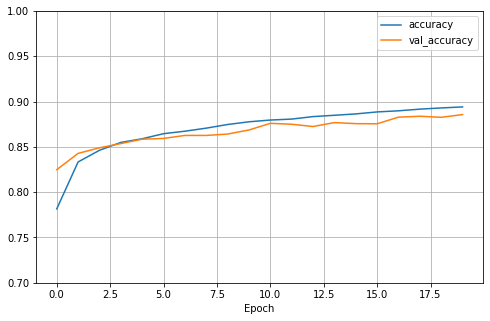

In [ ]:
fcnn_accuracies3 = pd.DataFrame(fcnn_history3.history)[['accuracy', 
                                                        'val_accuracy']]
fcnn_accuracies3.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.7, 1)
plt.xlabel('Epoch')
plt.show()

### Convolutional neural network

In [ ]:
def build_part2_CNN_model(kernel_size=(3,3), strides=(1,1)): 
  model = keras.models.Sequential()# Reference to week8 lab sheet
  model.add(keras.layers.Conv2D(32, kernel_size=kernel_size, activation="relu", 
                                strides = strides, input_shape=(28, 28, 1),
                                padding="same"))
  model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides = strides,
                                      padding="same"))
  model.add(keras.layers.Conv2D(64, kernel_size=kernel_size, activation="relu", 
                                strides = strides,padding="same"))
  model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides = strides,
                                      padding="same"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(10, activation="softmax"))
  return model

In [ ]:
part2_CNN_classifier = KerasClassifier(build_part2_CNN_model, 
                                       loss="sparse_categorical_crossentropy",
                                       kernel_size=(3,3),strides=(1,1),
                                       optimizer__lr=0.01, optimizer="adam", 
                                       metrics=["accuracy"])

In [ ]:
part2_CNN_param_grid = {
    "kernel_size":[(3,3), (5,5)],
    "strides": [(1,1),(2,2)],
    "optimizer__lr": [0.1, 0.01, 0.05]
}

part2_CNN_grid_search_cv = GridSearchCV(part2_CNN_classifier, 
                                        part2_CNN_param_grid, cv=2, verbose=2)

In [ ]:
part2_CNN_grid_search_cv

GridSearchCV(cv=3,
             estimator=KerasClassifier(kernel_size=(3, 3), loss='sparse_categorical_crossentropy', metrics=['accuracy'], model=<function build_part2_CNN_model at 0x7efd145c63b0>, optimizer='adam', optimizer__lr=0.01, strides=(1, 1)),
             param_grid={'kernel_size': [(3, 3), (2, 2)],
                         'optimizer__lr': [0.1, 0.01, 0.001],
                         'strides': [(1, 1), (2, 2)]},
             verbose=2)

In [ ]:
batch_size = 128
epochs = 3
part2_CNN_grid_search_cv.fit(X_train_CNN, y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_valid_CNN, y_valid))

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 110s 518ms/step - loss: 3.5584 - accuracy: 0.6829 - val_loss: 0.5358 - val_accuracy: 0.8123
Epoch 2/3
211/211 [==============================] - 106s 502ms/step - loss: 0.7720 - accuracy: 0.7423 - val_loss: 0.5785 - val_accuracy: 0.7997
Epoch 3/3
844/844 [==============================] - 22s 26ms/step
[CV] END kernel_size=(3, 3), optimizer__lr=0.1, strides=(1, 1); total time= 7.1min
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 108s 509ms/step - loss: 14.9683 - accuracy: 0.1030 - val_loss: 2.3083 - val_accuracy: 0.1032
Epoch 2/3
211/211 [==============================] - 107s 506ms/step - loss: 2.3081 - accuracy: 0.0983 - val_loss: 2.3126 - val_accuracy: 0.0980
Epoch 3/3
844/844 [==============================] - 22s 26ms/step
[CV] END kernel_size=(3, 3), optimizer__lr=0.1, strides=(1, 1); total time= 5.7min
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 5s 22ms/step - loss: 2.4243 - accuracy: 0.0969 - val_loss: 2.3085 - val_accuracy: 0.0972
Epoch 2/3
211/211 [==============================] - 4s 21ms/step - loss: 2.3084 - accuracy: 0.0959 - val_loss: 2.3056 - val_accuracy: 0.1040
Epoch 3/3
844/844 [==============================] - 2s 3ms/step
[CV] END kernel_size=(3, 3), optimizer__lr=0.1, strides=(2, 2); total time=  16.6s
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 5s 22ms/step - loss: 2.4251 - accuracy: 0.1002 - val_loss: 2.3084 - val_accuracy: 0.0943
Epoch 2/3
211/211 [==============================] - 4s 21ms/step - loss: 2.3089 - accuracy: 0.0980 - val_loss: 2.3127 - val_accuracy: 0.0980
Epoch 3/3
844/844 [==============================] - 2s 3ms/step
[CV] END kernel_size=(3, 3), optimizer__lr=0.1, strides=(2, 2); total time=  16.8s
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 110s 518ms/step - loss: 0.5520 - accuracy: 0.8191 - val_loss: 0.3671 - val_accuracy: 0.8718
Epoch 2/3
211/211 [==============================] - 109s 515ms/step - loss: 0.3559 - accuracy: 0.8747 - val_loss: 0.3063 - val_accuracy: 0.8895
Epoch 3/3
844/844 [==============================] - 23s 28ms/step
[CV] END kernel_size=(3, 3), optimizer__lr=0.01, strides=(1, 1); total time= 7.1min
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 108s 510ms/step - loss: 0.5512 - accuracy: 0.8186 - val_loss: 0.3451 - val_accuracy: 0.8800
Epoch 2/3
211/211 [==============================] - 109s 514ms/step - loss: 0.3517 - accuracy: 0.8719 - val_loss: 0.3198 - val_accuracy: 0.8870
Epoch 3/3
844/844 [==============================] - 21s 25ms/step
[CV] END kernel_size=(3, 3), optimizer__lr=0.01, strides=(1, 1); total time= 7.1min
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 5s 23ms/step - loss: 0.7936 - accuracy: 0.7138 - val_loss: 0.4948 - val_accuracy: 0.8160
Epoch 2/3
211/211 [==============================] - 5s 22ms/step - loss: 0.5355 - accuracy: 0.8064 - val_loss: 0.3952 - val_accuracy: 0.8510
Epoch 3/3
844/844 [==============================] - 2s 3ms/step
[CV] END kernel_size=(3, 3), optimizer__lr=0.01, strides=(2, 2); total time=  17.6s
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 5s 23ms/step - loss: 0.7862 - accuracy: 0.7183 - val_loss: 0.4500 - val_accuracy: 0.8345
Epoch 2/3
211/211 [==============================] - 5s 22ms/step - loss: 0.5322 - accuracy: 0.8064 - val_loss: 0.4086 - val_accuracy: 0.8532
Epoch 3/3
844/844 [==============================] - 2s 3ms/step
[CV] END kernel_size=(3, 3), optimizer__lr=0.01, strides=(2, 2); total time=  17.5s
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 107s 506ms/step - loss: 3.1809 - accuracy: 0.1033 - val_loss: 2.3054 - val_accuracy: 0.0972
Epoch 2/3
211/211 [==============================] - 106s 500ms/step - loss: 2.3055 - accuracy: 0.0980 - val_loss: 2.3042 - val_accuracy: 0.1040
Epoch 3/3
844/844 [==============================] - 21s 25ms/step
[CV] END kernel_size=(3, 3), optimizer__lr=0.05, strides=(1, 1); total time= 6.0min


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/3
211/211 [==============================] - 106s 502ms/step - loss: 2.3003 - accuracy: 0.7077 - val_loss: 0.8139 - val_accuracy: 0.7937
Epoch 2/3
211/211 [==============================] - 107s 507ms/step - loss: 0.7136 - accuracy: 0.7574 - val_loss: 0.6138 - val_accuracy: 0.7962
Epoch 3/3
844/844 [==============================] - 21s 25ms/step
[CV] END kernel_size=(3, 3), optimizer__lr=0.05, strides=(1, 1); total time= 6.0min
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 5s 22ms/step - loss: 0.8261 - accuracy: 0.7098 - val_loss: 0.5357 - val_accuracy: 0.8000
Epoch 2/3
211/211 [==============================] - 4s 21ms/step - loss: 0.6850 - accuracy: 0.7560 - val_loss: 0.4800 - val_accuracy: 0.8148
Epoch 3/3
844/844 [==============================] - 2s 3ms/step
[CV] END kernel_size=(3, 3), optimizer__lr=0.05, strides=(2, 2); total time=  16.9s
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 5s 22ms/step - loss: 2.3163 - accuracy: 0.0995 - val_loss: 2.3066 - val_accuracy: 0.1032
Epoch 2/3
211/211 [==============================] - 5s 21ms/step - loss: 2.3061 - accuracy: 0.1009 - val_loss: 2.3065 - val_accuracy: 0.0980
Epoch 3/3
844/844 [==============================] - 2s 3ms/step
[CV] END kernel_size=(3, 3), optimizer__lr=0.05, strides=(2, 2); total time=  16.8s
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 199s 942ms/step - loss: 15.9242 - accuracy: 0.1010 - val_loss: 2.3068 - val_accuracy: 0.0972
Epoch 2/3
211/211 [==============================] - 199s 942ms/step - loss: 2.3077 - accuracy: 0.0976 - val_loss: 2.3052 - val_accuracy: 0.1040
Epoch 3/3
844/844 [==============================] - 47s 56ms/step
[CV] END kernel_size=(5, 5), optimizer__lr=0.1, strides=(1, 1); total time=11.3min
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 200s 943ms/step - loss: 25.8200 - accuracy: 0.0998 - val_loss: 2.3075 - val_accuracy: 0.1032
Epoch 2/3
211/211 [==============================] - 199s 942ms/step - loss: 2.3085 - accuracy: 0.0972 - val_loss: 2.3129 - val_accuracy: 0.0980
Epoch 3/3
844/844 [==============================] - 46s 55ms/step
[CV] END kernel_size=(5, 5), optimizer__lr=0.1, strides=(1, 1); total time=11.7min
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 8s 36ms/step - loss: 2.5446 - accuracy: 0.1275 - val_loss: 2.2164 - val_accuracy: 0.1415
Epoch 2/3
211/211 [==============================] - 8s 36ms/step - loss: 2.1003 - accuracy: 0.1929 - val_loss: 1.2546 - val_accuracy: 0.4665
Epoch 3/3
844/844 [==============================] - 4s 4ms/step
[CV] END kernel_size=(5, 5), optimizer__lr=0.1, strides=(2, 2); total time=  27.1s
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 8s 36ms/step - loss: 2.8126 - accuracy: 0.1006 - val_loss: 2.3070 - val_accuracy: 0.0972
Epoch 2/3
211/211 [==============================] - 7s 35ms/step - loss: 2.3089 - accuracy: 0.0986 - val_loss: 2.3134 - val_accuracy: 0.0980
Epoch 3/3
844/844 [==============================] - 4s 4ms/step
[CV] END kernel_size=(5, 5), optimizer__lr=0.1, strides=(2, 2); total time=  27.0s
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 203s 959ms/step - loss: 0.6841 - accuracy: 0.7877 - val_loss: 0.3836 - val_accuracy: 0.8632
Epoch 2/3
211/211 [==============================] - 201s 953ms/step - loss: 0.3836 - accuracy: 0.8649 - val_loss: 0.3411 - val_accuracy: 0.8790
Epoch 3/3
844/844 [==============================] - 49s 58ms/step
[CV] END kernel_size=(5, 5), optimizer__lr=0.01, strides=(1, 1); total time=11.7min
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 202s 957ms/step - loss: 0.7285 - accuracy: 0.7951 - val_loss: 0.3655 - val_accuracy: 0.8710
Epoch 2/3
211/211 [==============================] - 205s 970ms/step - loss: 0.3697 - accuracy: 0.8661 - val_loss: 0.3470 - val_accuracy: 0.8782
Epoch 3/3
844/844 [==============================] - 47s 56ms/step
[CV] END kernel_size=(5, 5), optimizer__lr=0.01, strides=(1, 1); total time=11.2min
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 9s 39ms/step - loss: 0.6459 - accuracy: 0.7642 - val_loss: 0.4130 - val_accuracy: 0.8490
Epoch 2/3
211/211 [==============================] - 8s 39ms/step - loss: 0.4542 - accuracy: 0.8341 - val_loss: 0.3368 - val_accuracy: 0.8735
Epoch 3/3
844/844 [==============================] - 4s 5ms/step
[CV] END kernel_size=(5, 5), optimizer__lr=0.01, strides=(2, 2); total time=  46.8s


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/3
211/211 [==============================] - 8s 38ms/step - loss: 0.6707 - accuracy: 0.7518 - val_loss: 0.4060 - val_accuracy: 0.8477
Epoch 2/3
211/211 [==============================] - 8s 37ms/step - loss: 0.4609 - accuracy: 0.8333 - val_loss: 0.3649 - val_accuracy: 0.8625
Epoch 3/3
844/844 [==============================] - 4s 5ms/step
[CV] END kernel_size=(5, 5), optimizer__lr=0.01, strides=(2, 2); total time=  45.8s
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 205s 970ms/step - loss: 13.0221 - accuracy: 0.6527 - val_loss: 0.6653 - val_accuracy: 0.7643
Epoch 2/3
211/211 [==============================] - 202s 959ms/step - loss: 0.7125 - accuracy: 0.7568 - val_loss: 0.5743 - val_accuracy: 0.8057
Epoch 3/3
844/844 [==============================] - 47s 56ms/step
[CV] END kernel_size=(5, 5), optimizer__lr=0.05, strides=(1, 1); total time=11.5min
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 202s 954ms/step - loss: 15.4866 - accuracy: 0.7353 - val_loss: 0.5111 - val_accuracy: 0.8155
Epoch 2/3
211/211 [==============================] - 206s 978ms/step - loss: 0.5599 - accuracy: 0.7991 - val_loss: 0.5112 - val_accuracy: 0.8208
Epoch 3/3
844/844 [==============================] - 48s 57ms/step
[CV] END kernel_size=(5, 5), optimizer__lr=0.05, strides=(1, 1); total time=11.0min
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 8s 37ms/step - loss: 0.8857 - accuracy: 0.6937 - val_loss: 0.5886 - val_accuracy: 0.7692
Epoch 2/3
211/211 [==============================] - 8s 36ms/step - loss: 0.6871 - accuracy: 0.7572 - val_loss: 0.4892 - val_accuracy: 0.8180
Epoch 3/3
844/844 [==============================] - 4s 4ms/step
[CV] END kernel_size=(5, 5), optimizer__lr=0.05, strides=(2, 2); total time=  29.1s
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


211/211 [==============================] - 8s 37ms/step - loss: 2.4031 - accuracy: 0.0980 - val_loss: 2.3065 - val_accuracy: 0.1032
Epoch 2/3
211/211 [==============================] - 8s 37ms/step - loss: 2.3059 - accuracy: 0.1016 - val_loss: 2.3065 - val_accuracy: 0.0980
Epoch 3/3
844/844 [==============================] - 4s 4ms/step
[CV] END kernel_size=(5, 5), optimizer__lr=0.05, strides=(2, 2); total time=  28.1s
Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


422/422 [==============================] - 221s 523ms/step - loss: 0.4697 - accuracy: 0.8428 - val_loss: 0.3166 - val_accuracy: 0.8887
Epoch 2/3
422/422 [==============================] - 232s 550ms/step - loss: 0.3416 - accuracy: 0.8774 - val_loss: 0.2958 - val_accuracy: 0.8928
Epoch 3/3
422/422 [==============================] - 227s 538ms/step - loss: 0.3153 - accuracy: 0.8880 - val_loss: 0.2964 - val_accuracy: 0.8908


GridSearchCV(cv=2,
             estimator=KerasClassifier(kernel_size=(3, 3), loss='sparse_categorical_crossentropy', metrics=['accuracy'], model=<function build_part2_CNN_model at 0x7f518700dd40>, optimizer='adam', optimizer__lr=0.01, strides=(1, 1)),
             param_grid={'kernel_size': [(3, 3), (5, 5)],
                         'optimizer__lr': [0.1, 0.01, 0.05],
                         'strides': [(1, 1), (2, 2)]},
             verbose=2)

In [ ]:
best_one_here_CNN_part2 = part2_CNN_grid_search_cv.best_estimator_

In [ ]:
part2_CNN_grid_search_cv.best_params_

{'kernel_size': (3, 3), 'optimizer__lr': 0.01, 'strides': (1, 1)}

In [ ]:
best_CNN_part2_history=best_one_here_CNN_part2.fit(X_train_CNN, y_train, 
                                                   batch_size=batch_size,
                    epochs=epochs, validation_data=(X_valid_CNN, y_valid))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/3
422/422 [==============================] - 231s 544ms/step - loss: 0.4391 - accuracy: 0.8470 - val_loss: 0.3112 - val_accuracy: 0.8902
Epoch 2/3
422/422 [==============================] - 213s 505ms/step - loss: 0.3277 - accuracy: 0.8802 - val_loss: 0.2927 - val_accuracy: 0.8930
Epoch 3/3
422/422 [==============================] - 210s 498ms/step - loss: 0.3061 - accuracy: 0.8893 - val_loss: 0.2985 - val_accuracy: 0.8922


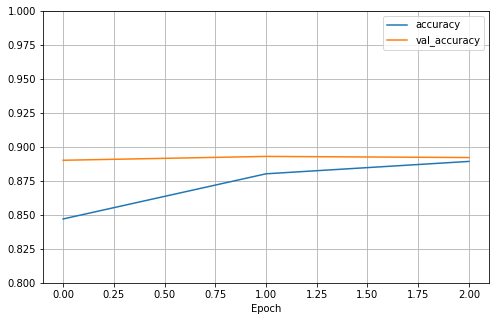

In [ ]:
import pandas as pd

# Convert the history dictionary to a Pandas dataframe and extract accuracies
fcnn_accuracies3 = pd.DataFrame(best_CNN_part2_history.history_)\
[['accuracy', 'val_accuracy']]
fcnn_accuracies3.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.8, 1)
plt.xlabel('Epoch')
plt.show()

#### CNN1 -> (kernel=(5,5),strides=(1,1);l_r=(0.01))

In [ ]:
kernel = (5,5)
strides = (1,1)
l_r = 0.01
model_CNN1 = keras.Sequential([
    
    # Specify the input shape
    keras.Input(shape=(28, 28, 1)),
    
    # Conv and pool block 1
    keras.layers.Conv2D(32, kernel_size=kernel, activation="relu", 
                        strides=strides,padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides = strides,
                              padding="same"),
    
    # Conv and pool block 2
    keras.layers.Conv2D(64, kernel_size=kernel, activation="relu", 
                        strides=strides,padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides = strides,
                              padding="same"),
    
    # Flatten and classify using dense output layer
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax"),
])
model_CNN1.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=l_r),
              metrics=['accuracy'])
batch_size = 128
epochs = 3

In [ ]:
history1 = model_CNN1.fit(X_train_CNN, y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_valid_CNN, y_valid))

Epoch 1/3
422/422 [==============================] - 438s 1s/step - loss: 0.5441 - accuracy: 0.8312 - val_loss: 0.3296 - val_accuracy: 0.8808
Epoch 2/3
422/422 [==============================] - 393s 930ms/step - loss: 0.3608 - accuracy: 0.8709 - val_loss: 0.3341 - val_accuracy: 0.8747
Epoch 3/3
422/422 [==============================] - 392s 928ms/step - loss: 0.3421 - accuracy: 0.8766 - val_loss: 0.3133 - val_accuracy: 0.8928


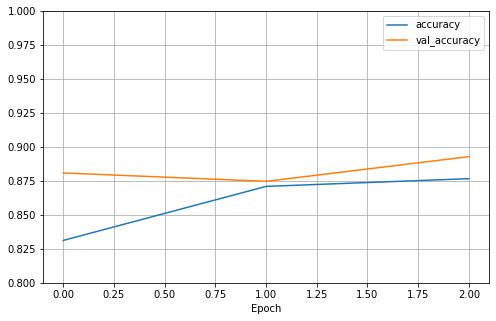

In [ ]:
import pandas as pd

# Convert the history dictionary to a Pandas dataframe and extract accuracies
CNN_accuracies1 = pd.DataFrame(history1)[['accuracy', 'val_accuracy']]

# Plot the accuracies
CNN_accuracies1.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.8, 1)
plt.xlabel('Epoch')
plt.show()

#### CNN2 -> (kernel=(3,3),strides=(1,1),l_r=(0.05))

In [ ]:
kernel = (3,3)
strides = (1,1)
l_r = 0.05
model_CNN2 = keras.Sequential([
    
    # Specify the input shape
    keras.Input(shape=(28, 28, 1)),
    
    # Conv and pool block 1
    keras.layers.Conv2D(32, kernel_size=kernel, activation="relu", 
                        strides=strides,padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides = strides,
                              padding="same"),
    
    # Conv and pool block 2
    keras.layers.Conv2D(64, kernel_size=kernel, activation="relu", 
                        strides=strides,padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides = strides,
                              padding="same"),
    
    # Flatten and classify using dense output layer
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax"),
])
model_CNN2.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=l_r),
              metrics=['accuracy'])
batch_size = 128
epochs = 3

In [ ]:
history2 = model_CNN2.fit(X_train_CNN, y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_valid_CNN, y_valid))

Epoch 1/3
422/422 [==============================] - 210s 497ms/step - loss: 1.9092 - accuracy: 0.7446 - val_loss: 0.4995 - val_accuracy: 0.8133
Epoch 2/3
422/422 [==============================] - 210s 498ms/step - loss: 0.5490 - accuracy: 0.8048 - val_loss: 0.5065 - val_accuracy: 0.8285
Epoch 3/3
422/422 [==============================] - 209s 496ms/step - loss: 0.5561 - accuracy: 0.8040 - val_loss: 0.4472 - val_accuracy: 0.8443


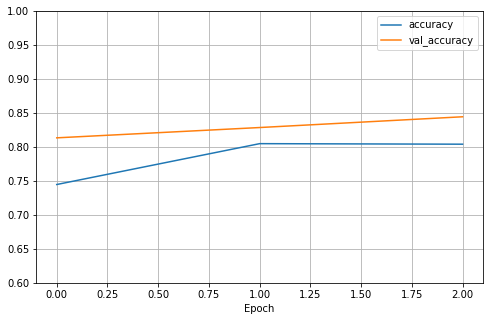

In [ ]:
import pandas as pd

# Convert the history dictionary to a Pandas dataframe and extract accuracies
CNN_accuracies2 = pd.DataFrame(history2.history)[['accuracy', 'val_accuracy']]

# Plot the accuracies
CNN_accuracies2.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.6, 1)
plt.xlabel('Epoch')
plt.show()

#### CNN3 -> (kernel=(3,3),strides=(2,2),l_r=(0.01))

In [ ]:
kernel = (3,3)
strides = (2,2)
l_r = 0.01
model_CNN3 = keras.Sequential([
    
    # Specify the input shape
    keras.Input(shape=(28, 28, 1)),
    
    # Conv and pool block 1
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", 
                        strides=strides,padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=strides),
    
    # Conv and pool block 2
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu", 
                        strides=strides,padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=strides,padding="same"),
    
    # Flatten and classify using dense output layer
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax"),
])
model_CNN3.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=l_r),
              metrics=['accuracy'])
batch_size = 128
epochs = 3

In [ ]:
history3 = model_CNN3.fit(X_train_CNN, y_train, batch_size=batch_size,
                    epochs=epochs, validation_data=(X_valid_CNN, y_valid))

Epoch 1/3
422/422 [==============================] - 10s 22ms/step - loss: 0.6379 - accuracy: 0.7699 - val_loss: 0.3913 - val_accuracy: 0.8538
Epoch 2/3
422/422 [==============================] - 9s 22ms/step - loss: 0.4662 - accuracy: 0.8307 - val_loss: 0.3535 - val_accuracy: 0.8745
Epoch 3/3
422/422 [==============================] - 9s 21ms/step - loss: 0.4344 - accuracy: 0.8427 - val_loss: 0.3389 - val_accuracy: 0.8805


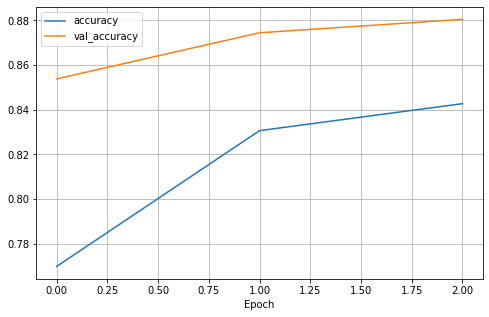

In [ ]:
import pandas as pd

# Convert the history dictionary to a Pandas dataframe and extract accuracies
CNN_accuracies3 = pd.DataFrame(history3.history)[['accuracy', 'val_accuracy']]

# Plot the accuracies
CNN_accuracies3.plot(figsize=(8, 5))
plt.grid(True)

plt.xlabel('Epoch')
plt.show()

In [ ]:
outputs = []
fcnn_part1_his = fcnn_part1_history.history
fcnn_part1_his["name"] = "fcnn_part1_his"
outputs.append(fcnn_part1_his)
CNN_part1_his = CNN_history_part1.history
CNN_part1_his["name"] = "CNN_part1_his"
outputs.append(CNN_part1_his)
fcnn_his_best = history.history_
fcnn_his_best["name"] = "fcnn_his_best"
outputs.append(fcnn_his_best)
fcnn_his2 = fcnn_history2.history
fcnn_his2["name"] = "fcnn_his2"
outputs.append(fcnn_his2)
fcnn_his3 = fcnn_history3.history
fcnn_his3["name"] = "fcnn_his3"
outputs.append(fcnn_his3)
his1 = history1.history
his1["name"] = "history1"
outputs.append(his1)
his2 = history2.history
his2["name"] = "history2"
outputs.append(his2)
his3 = history3.history
his3["name"] = "history3"
outputs.append(his3)
CNN_his_best = best_CNN_part2_history.history_
CNN_his_best["name"] = ["CNN_his_best"]
outputs.append(CNN_his_best)
title = "output.txt"
with open('output_new.txt', 'w') as f:
    for line in outputs:
      f.write(str(line))
      f.write('\n')

## Part 4. Final models
In this section, please ensure to include cells to train each model with its best hyperparmater combination independently of the hyperparameter tuning cells, i.e. don't rely on the hyperparameter tuning cells having been run.

### Algorithm of choice from first six weeks of course

In [ ]:
rf_best = RandomForestClassifier(criterion = "entropy", random_state = 0, 
                                 n_estimators = 100, max_leaf_nodes = None)

In [ ]:

rf_best.fit(X_train.reshape(54000,28*28), y_train)
y_pred = rf_best.predict(X_test.reshape(10000,28*28))
print("RF - accuracy on test set: {:.3f}".format(accuracy_score(y_test, 
                                                                y_pred)))

RF - accuracy on test set: 0.877


### Fully connected neural network

In [ ]:
fcnn_model_best_final = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), # activation_function = tanh, 
    keras.layers.Dense(300, activation="tanh"),# lr = 0.05
    keras.layers.Dense(100, activation="tanh"),
    keras.layers.Dense(10, activation="softmax")
])
opt = keras.optimizers.SGD(learning_rate=0.05)
fcnn_model_best_final.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
fcnn_model_best_final_history = fcnn_model_best_final.fit(X_train, y_train, 
                                                          epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5252 - accuracy: 0.8117 - val_loss: 0.4246 - val_accuracy: 0.8467
Epoch 2/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4093 - accuracy: 0.8513 - val_loss: 0.3887 - val_accuracy: 0.8582
Epoch 3/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3745 - accuracy: 0.8636 - val_loss: 0.3725 - val_accuracy: 0.8645
Epoch 4/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3499 - accuracy: 0.8733 - val_loss: 0.3757 - val_accuracy: 0.8623
Epoch 5/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3327 - accuracy: 0.8780 - val_loss: 0.3603 - val_accuracy: 0.8700
Epoch 6/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3174 - accuracy: 0.8844 - val_loss: 0.3496 - val_accuracy: 0.8757
Epoch 7/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.8873 - val_loss: 0.3239 - val_accuracy:

In [ ]:
y_pred_fcnn = fcnn_model_best_final.predict(X_test)
y_pred_fcnn_now = np.argmax(y_pred_fcnn, axis=-1)
print("fcnn - accuracy on test set: {:.3f}".format\
      (accuracy_score(y_test, y_pred_fcnn_now)))

fcnn - accuracy on test set: 0.881


### Convolutional neural network

In [ ]:
kernel = (3,3)
strides = (1,1)
l_r = 0.01
model_CNN_final_best = keras.Sequential([
    
    # Specify the input shape
    keras.Input(shape=(28, 28, 1)),
    
    # Conv and pool block 1
    keras.layers.Conv2D(32, kernel_size=kernel, activation="relu", 
                        strides=strides,padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides = strides,
                              padding="same"),
    
    # Conv and pool block 2
    keras.layers.Conv2D(64, kernel_size=kernel, activation="relu", 
                        strides=strides,padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides = strides,
                              padding="same"),
    
    # Flatten and classify using dense output layer
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax"),
])
model_CNN_final_best.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=l_r),
              metrics=['accuracy'])
batch_size = 128
epochs = 3

In [ ]:
history_CNN_final = model_CNN_final_best.fit(X_train_CNN, y_train, 
                                             batch_size=batch_size,
                    epochs=epochs, validation_data=(X_valid_CNN, y_valid))

Epoch 1/3
422/422 [==============================] - 156s 369ms/step - loss: 0.4790 - accuracy: 0.8442 - val_loss: 0.3186 - val_accuracy: 0.8898
Epoch 2/3
422/422 [==============================] - 155s 368ms/step - loss: 0.3379 - accuracy: 0.8784 - val_loss: 0.3093 - val_accuracy: 0.8852
Epoch 3/3
422/422 [==============================] - 155s 368ms/step - loss: 0.3194 - accuracy: 0.8838 - val_loss: 0.2888 - val_accuracy: 0.8968


In [ ]:
y_pred_CNN = model_CNN_final_best.predict(X_test)
y_pred_CNN_now = np.argmax(y_pred_CNN, axis=-1)
print("fcnn - accuracy on test set: {:.3f}".format\
      (accuracy_score(y_test, y_pred_CNN_now)))

fcnn - accuracy on test set: 0.889
